### Table of Contents

* [Goals](#goals)
* [Data](#Data)
    * [Loading the Data](#section1_1)
    * [Data Information](#section1_2)
* [Data Cleaning](#cleaning)
    * [Adding an Age Column](#section2_1)
    * [Checking the Education Variable](#section2_2)
* [Exploratory Data Analysis](#EDA)
    * [Big Picture](#section3_1)
    * [Purchasing Behavior by Income](#section3_2)
    * [More Purchasing Behavior by Income](#section3_3)
    * [Purchasing Behavior by Education and Income](#section3_4)
    * [Purchasing Behavior by Age](#section3_5)
* [Conclusion](#conclusion)
    

### Goals <a class="anchor" id="Goals"></a>

This notebook contains an analysis on some marketing data. The goal for this project was to do the following:
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions

### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

[https://www.kaggle.com/jackdaoud/marketing-data](https://www.kaggle.com/jackdaoud/marketing-data)

**id                  :** Customer's unique identifier<br>
**Year_Birth          :** Customer's birth year<br>
**Education           :** Customer's education level<br>
**MaritalStatus       :** Customer's marital status<br>
**Income              :** Customer's yearly household income<br>
**Kidhome             :** Number of children in customer's household<br>
**Teenhome            :** Number of teenagers in customer's household<br>
**DtCustomer          :** Date of customer's enrollment with the company<br>
**Recency             :** Number of days since customer's last purchase<br>
**MntWines            :** Amount spent on wine in the last 2 years<br>
**MntFruits           :** Amount spent on fruits in the last 2 years<br>
**MntMeatProducts     :** Amount spent on meat in the last 2 years<br>
**MntFishProducts     :** Amount spent on fish in the last 2 years<br>
**MntSweetProducts    :** Amount spent on sweets in the last 2 years<br>
**MntGoldProducts     :** Amount spent on gold in the last 2 years<br>
**NumDealsPurchases   :** Number of purchases made with a discount<br>
**NumWebPurchases     :** Number of purchases made through the company's web site<br>
**NumCatalogPurchases :** Number of purchases made using a catalogue<br>
**NumStorePurchases   :** Number of purchases made directly in stores<br>
**NumWebVisitsMonth   :** Number of visits to company's web site in the last month<br>
**AcceptedCmp1        :** 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
**AcceptedCmp2        :** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
**AcceptedCmp3        :** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
**AcceptedCmp4        :** 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
**AcceptedCmp5        :** 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
**Response            :** 1 if customer accepted the offer in the last campaign, 0 otherwise<br>
**Complain            :** 1 if customer complained in the last 2 years, 0 otherwise<br>
**Country             :** Customer's location<br>

#### Loading the Data <a class="anchor" id="section1_1"></a>
First, the necessary libraries are loaded into the notebook. The pandas library is used to import data from marketing_data.csv and preview the first five rows of the DataFrame.

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [142]:
df = pd.read_csv("marketing_data.csv")

In [143]:
df.head()

id  YearBirth   Education MaritalStatus       Income  Kidhome  Teenhome  \
0   1826       1970  Graduation      Divorced  $84,835.00         0         0   
1      1       1961  Graduation        Single  $57,091.00         0         0   
2  10476       1958  Graduation       Married  $67,267.00         0         1   
3   1386       1967  Graduation      Together  $32,474.00         1         1   
4   5371       1989  Graduation        Single  $21,474.00         1         0   

  DtCustomer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0    6/16/14        0       189        104              379              111   
1    6/15/14        0       464          5               64                7   
2    5/13/14        0       134         11               59               15   
3    5/11/14        0        10          0                1                0   
4     4/8/14        0         6         16               24               11   

   MntSweetProducts  MntGoldProducts  NumDealsPurchases  NumWebPurchases  \
0               189              218                  1                4   
1                 0               37                  1                7   
2                 2               30                  1                3   
3                 0                0                  1                1   
4                 0               34                  2                3   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    4                  6                  1             0   
1                    3                  7                  5             0   
2                    2                  5                  2             0   
3                    0                  2                  7             0   
4                    1                  2                  7             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  \
0             0             0             0             0         1         0   
1             0             0             0             1         1         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         1         0   

  Country  
0      SP  
1      CA  
2      US  
3     AUS  
4      SP

#### Data Information <a class="anchor" id="section1_2"></a>

Some immediate insights are:
* There are 28 columns and 2240 rows.
* The name and datatype of each column -- most values are integers in this dataset.
* The ` income` column has missing data, values that are not integers or floats, and an extra space in the column name, so some cleaning will be necessary for this column prior to conducting EDA. 
* The column names could be renamed for more consistency.
* Some basic summary statistics on each of the numerical variables.

In [144]:
df.shape

(2240, 28)

In [145]:
df.duplicated().sum()

0

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [147]:
df.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [148]:
df.describe().T

count         mean          std     min      25%  \
id                   2240.0  5592.159821  3246.662198     0.0  2828.25   
YearBirth            2240.0  1968.805804    11.984069  1893.0  1959.00   
Kidhome              2240.0     0.444196     0.538398     0.0     0.00   
Teenhome             2240.0     0.506250     0.544538     0.0     0.00   
Recency              2240.0    49.109375    28.962453     0.0    24.00   
MntWines             2240.0   303.935714   336.597393     0.0    23.75   
MntFruits            2240.0    26.302232    39.773434     0.0     1.00   
MntMeatProducts      2240.0   166.950000   225.715373     0.0    16.00   
MntFishProducts      2240.0    37.525446    54.628979     0.0     3.00   
MntSweetProducts     2240.0    27.062946    41.280498     0.0     1.00   
MntGoldProducts      2240.0    44.021875    52.167439     0.0     9.00   
NumDealsPurchases    2240.0     2.325000     1.932238     0.0     1.00   
NumWebPurchases      2240.0     4.084821     2.778714     0.0     2.00   
NumCatalogPurchases  2240.0     2.662054     2.923101     0.0     0.00   
NumStorePurchases    2240.0     5.790179     3.250958     0.0     3.00   
NumWebVisitsMonth    2240.0     5.316518     2.426645     0.0     3.00   
AcceptedCmp3         2240.0     0.072768     0.259813     0.0     0.00   
AcceptedCmp4         2240.0     0.074554     0.262728     0.0     0.00   
AcceptedCmp5         2240.0     0.072768     0.259813     0.0     0.00   
AcceptedCmp1         2240.0     0.064286     0.245316     0.0     0.00   
AcceptedCmp2         2240.0     0.013393     0.114976     0.0     0.00   
Response             2240.0     0.149107     0.356274     0.0     0.00   
Complain             2240.0     0.009375     0.096391     0.0     0.00   

                        50%      75%      max  
id                   5458.5  8427.75  11191.0  
YearBirth            1970.0  1977.00   1996.0  
Kidhome                 0.0     1.00      2.0  
Teenhome                0.0     1.00      2.0  
Recency                49.0    74.00     99.0  
MntWines              173.5   504.25   1493.0  
MntFruits               8.0    33.00    199.0  
MntMeatProducts        67.0   232.00   1725.0  
MntFishProducts        12.0    50.00    259.0  
MntSweetProducts        8.0    33.00    263.0  
MntGoldProducts        24.0    56.00    362.0  
NumDealsPurchases       2.0     3.00     15.0  
NumWebPurchases         4.0     6.00     27.0  
NumCatalogPurchases     2.0     4.00     28.0  
NumStorePurchases       5.0     8.00     13.0  
NumWebVisitsMonth       6.0     7.00     20.0  
AcceptedCmp3            0.0     0.00      1.0  
AcceptedCmp4            0.0     0.00      1.0  
AcceptedCmp5            0.0     0.00      1.0  
AcceptedCmp1            0.0     0.00      1.0  
AcceptedCmp2            0.0     0.00      1.0  
Response                0.0     0.00      1.0  
Complain                0.0     0.00      1.0

In [149]:
# I see 1893 as the date of birth This didn't seem very usual.

#### Data Cleaning <a class="anchor" id="cleaning"></a>

As mentioned before, the `Income` column could use some cleaning. The column names overall could also be renamed for more consistency. To do this, the following is done:
* Put all columns in [snake case format](https://www.ssc.wisc.edu/sscc/pubs/DWE/book/4-2-naming-variables.html) using regex and list comprehension
* Change `Income` values to floats
* Set the values as floats

The `Income` distribution is then looked at using boxplots. Since there is one large outlier, it is removed from the `marketing_data`. Next, the missing values are replaced with the mean income using the `.mean()` method.

`Income` is one of the main variables that will be explored in the analysis, so it is essential that it is tidy and ready for exploration

In [150]:
df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower() for col in df.columns]

In [151]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_products', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'response', 'complain', 'country'],
      dtype='object')

In [152]:
df["income"] = df["income"].str.strip("$").str.replace(",","").astype("float")

In [153]:
len(df.select_dtypes("number").columns)

24

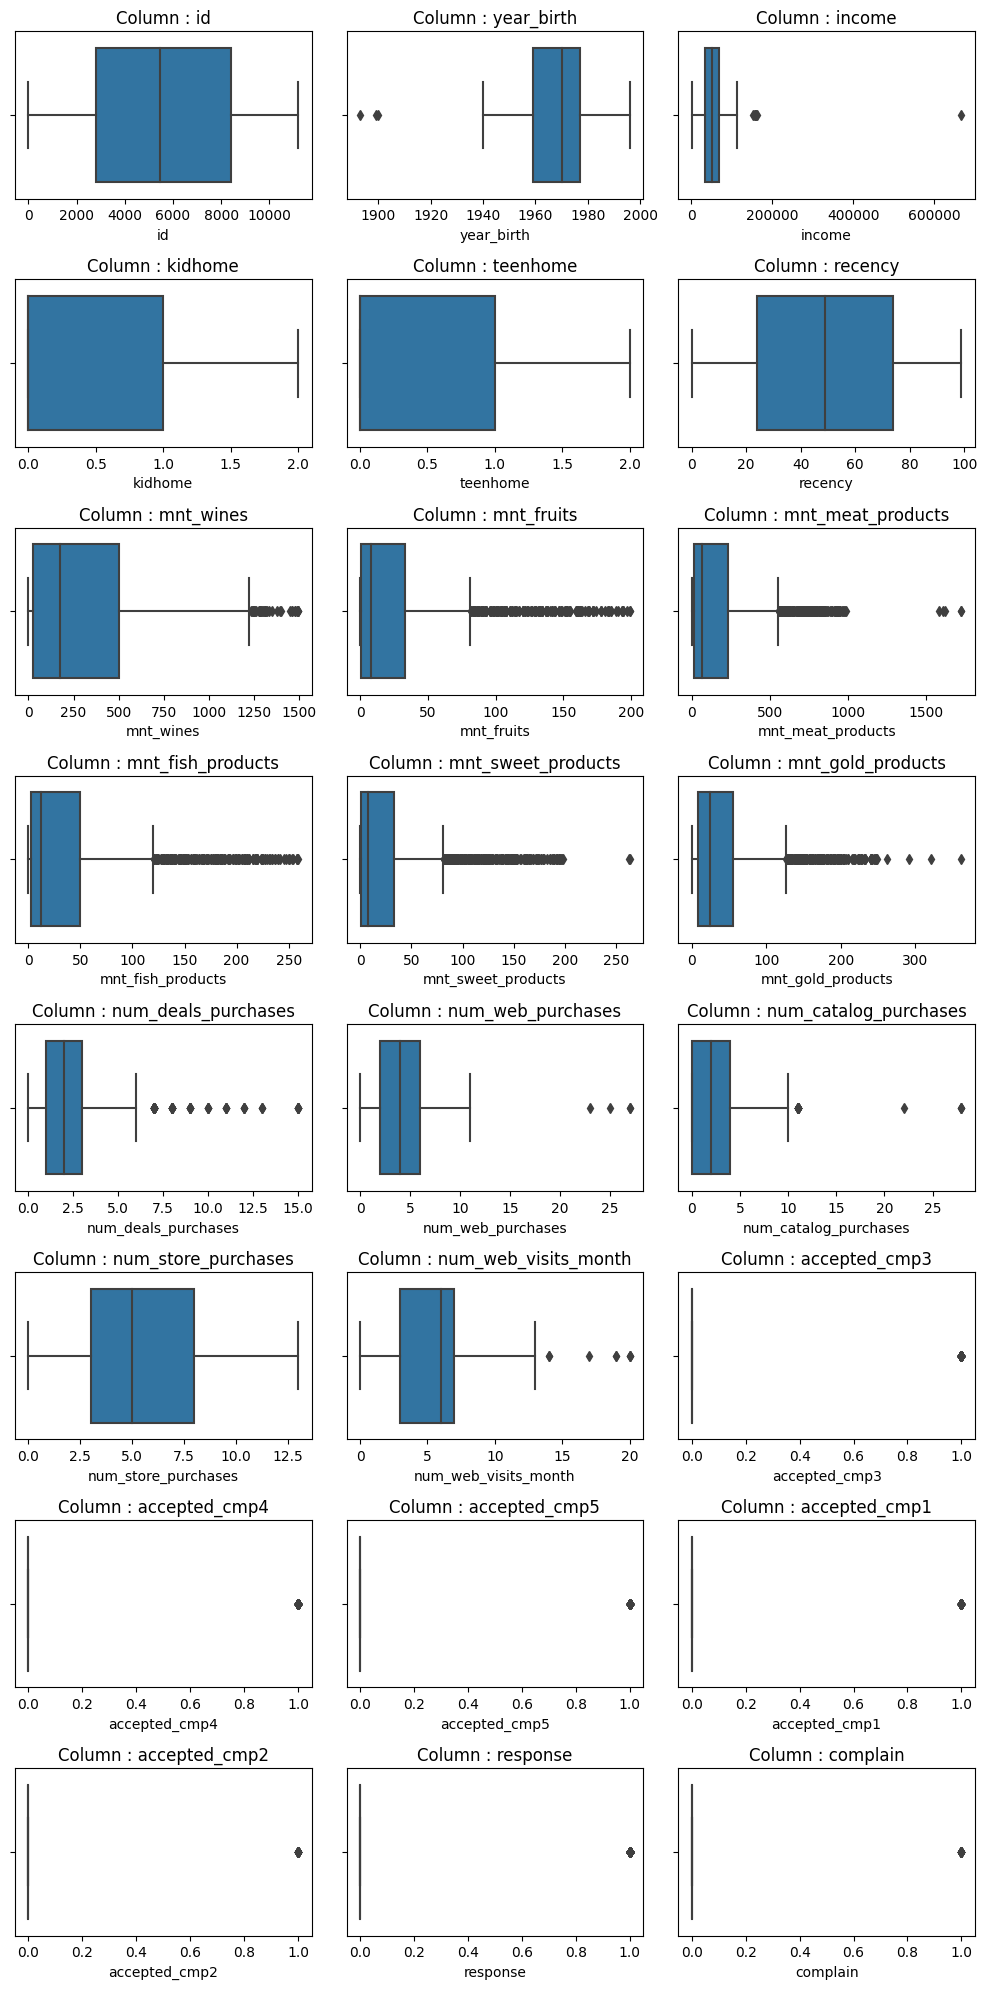

In [154]:
i = 1
plt.figure(figsize=(10, 20))
for col in df.select_dtypes("number").columns:
    plt.subplot(8,3,i)
    plt.title(f"Column : {col}")
    sns.boxplot(df[col])
    i += 1
plt.tight_layout()

These boxplots show major outliers on the right and left, so they are removed from the dataset. 

In [155]:
df[df["income"] > 600000].index[0]

527

In [156]:
df.shape

(2240, 28)

In [157]:
df.drop(index=df[df["income"] > 200000].index[0], inplace= True)

In [158]:
df.shape

(2239, 28)

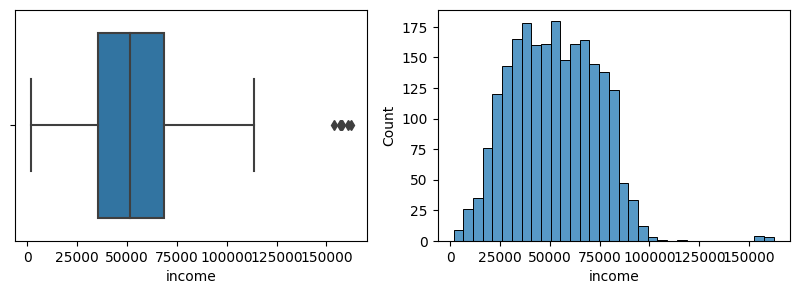

In [184]:
plt.figure(figsize=(10, 3))
plt.subplot(121)
sns.boxplot(df["income"])

plt.subplot(122)
sns.histplot(df["income"]);

After removing the outlier, the distribution is more symmetric. There are still some outliers; however, with not major skewness or huge outliers remaining, the `income` variable is ready for analysis.

In [176]:
df["income"].fillna(df["income"].mean(), inplace = True)

In [177]:
df.isnull().sum().sum()

0

#### Adding an age Column <a class="anchor" id="section2_1"></a>

The `marketing_data` DataFrame contains a `year_birth` column; however, a column with the age of each customer may be easier for analysis. Because of this, the following is done:

* A new column called `age` is made by subracting each value of `year_birth` from 2020 (the year the dataset is from). 
* Any outliers in `age` that could affect the analysis are removed. 

In [161]:
df["age"] = 2020 - df["year_birth"]

In [162]:
df.shape

(2239, 29)

In [170]:
df[df["age"] > 110].index

Int64Index([513, 827, 2233], dtype='int64')

In [172]:
df.drop(index = df[df["age"] > 110].index, inplace=True)

In [173]:
df.shape

(2236, 29)

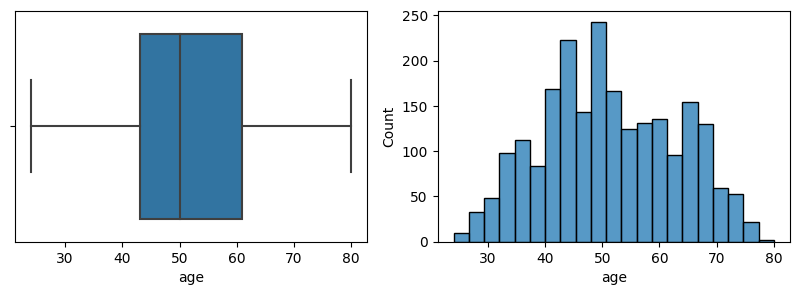

In [185]:
plt.figure(figsize=(10, 3))
plt.subplot(121)
sns.boxplot(df["age"])

plt.subplot(122)
sns.histplot(df["age"]);

After removing the major outliers the `age` distribution is symmetric and ready for analysis.

#### Checking the Education Variable <a class="anchor" id="section2_2"></a>

The education variable is another column that will be focused on in the analysis. A boxplot is used to see if any cleaning is needed before EDA. There is no missing data or other issues, so it can be left as is.

In [188]:
df["education"].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

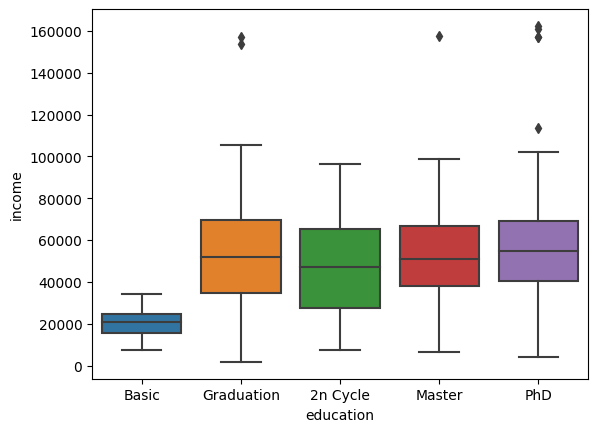

In [195]:
sns.boxplot(data = df, x = "education", y = "income",
            order = ["Basic", "Graduation", "2n Cycle", "Master", "PhD"]);

### Exploratory Data Analysis <a class="anchor" id="EDA"></a>

After some data cleaning and tidying, the DataFrame is ready for EDA. The following independent variables will be focused on in the analysis:
* `income`
* `education`
* `age`

The goal will be to see how these independent variables associate with the following dependent variables:
* `mnt_wines`
* `mnt_fruits`
* `mnt_meat_products`
* `mnt_fish_products`
* `mnt_sweet_products`  
* `mnt_gold_products`  
* `num_deals_purchases`
* `num_web_purchases`  
* `num_catalog_purchases`  
* `num_store_purchases`

The hope is that through summary statistics and visualizations the following question can be answered:
* Does a shopper's income, education level, and/or age relate to their purchasing behavior? 

Along the way, this question may be refined and more questions may pop up.

#### Big Picture <a class="anchor" id="section3_1">

In order to observe the dataset as a whole, `DataFrame.hist()` is used.. It gives a full view of all numerical variables in the distribution. Most of the amount bought and number purchased variables are skewed right and have similar distributions.

Next, correlations between all numerical variables are viewed using a heat matrix. The heat matrix shows that `income` has the strongest association with numerous variables. Interestingly, it showed that `age` may not be a huge factor overall. This is something to look into it a bit more in the analysis.

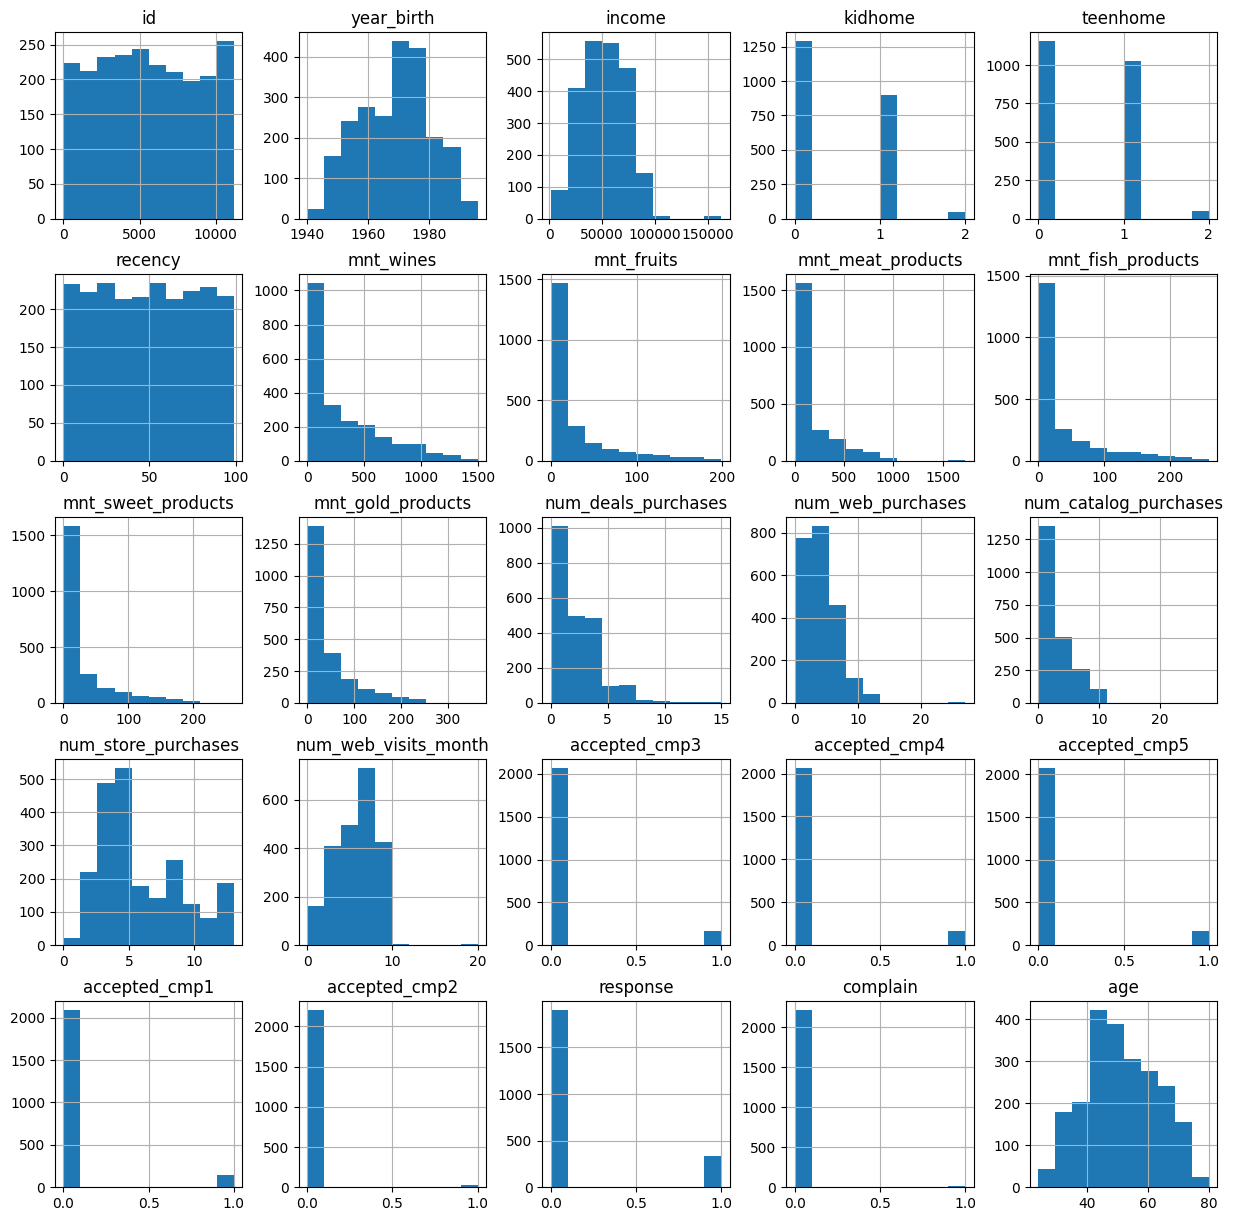

In [206]:
df.hist(figsize=(15, 15));

This overview shows that the purchase behavior columns are all skewed to the right.

In [224]:
df.corr()

id  year_birth    income   kidhome  teenhome  \
id                     1.000000    0.002659  0.000901  0.001656 -0.003052   
year_birth             0.002659    1.000000 -0.198871  0.233894 -0.363172   
income                 0.000901   -0.198871  1.000000 -0.510323  0.034356   
kidhome                0.001656    0.233894 -0.510323  1.000000 -0.035339   
teenhome              -0.003052   -0.363172  0.034356 -0.035339  1.000000   
recency               -0.046300   -0.019396  0.007919  0.007964  0.016746   
mnt_wines             -0.020726   -0.162809  0.685991 -0.496166  0.005047   
mnt_fruits             0.007247   -0.013657  0.504877 -0.372442 -0.176117   
mnt_meat_products     -0.002274   -0.030729  0.684173 -0.436901 -0.261171   
mnt_fish_products     -0.022903   -0.042359  0.518409 -0.387404 -0.204177   
mnt_sweet_products    -0.006112   -0.019379  0.518150 -0.370486 -0.162527   
mnt_gold_products     -0.010339   -0.057419  0.383578 -0.349462 -0.020447   
num_deals_purchases   -0.037393   -0.068286 -0.107150  0.221489  0.388293   
num_web_purchases     -0.017712   -0.153873  0.450581 -0.361982  0.155649   
num_catalog_purchases -0.001592   -0.125285  0.693702 -0.502331 -0.110551   
num_store_purchases   -0.013613   -0.139237  0.627988 -0.500192  0.050177   
num_web_visits_month  -0.008256    0.117498 -0.646413  0.447626  0.134636   
accepted_cmp3         -0.035823    0.061107 -0.015146  0.014739 -0.042949   
accepted_cmp4         -0.025150   -0.064261  0.217715 -0.161686  0.038680   
accepted_cmp5         -0.004916    0.015411  0.394276 -0.204918 -0.190383   
accepted_cmp1         -0.021392   -0.008146  0.325277 -0.172435 -0.140426   
accepted_cmp2         -0.014970   -0.007621  0.104029 -0.081760 -0.015715   
response              -0.021596    0.018557  0.161034 -0.080005 -0.154941   
complain               0.031580   -0.004450 -0.027899  0.036336  0.007553   
age                   -0.002659   -1.000000  0.198871 -0.233894  0.363172   

                        recency  mnt_wines  mnt_fruits  mnt_meat_products  \
id                    -0.046300  -0.020726    0.007247          -0.002274   
year_birth            -0.019396  -0.162809   -0.013657          -0.030729   
income                 0.007919   0.685991    0.504877           0.684173   
kidhome                0.007964  -0.496166   -0.372442          -0.436901   
teenhome               0.016746   0.005047   -0.176117          -0.261171   
recency                1.000000   0.016321   -0.003717           0.023446   
mnt_wines              0.016321   1.000000    0.388472           0.561886   
mnt_fruits            -0.003717   0.388472    1.000000           0.542030   
mnt_meat_products      0.023446   0.561886    0.542030           1.000000   
mnt_fish_products      0.001314   0.398956    0.594415           0.567813   
mnt_sweet_products     0.022796   0.385845    0.567030           0.523329   
mnt_gold_products      0.017168   0.386234    0.389999           0.348727   
num_deals_purchases   -0.000638   0.011173   -0.131792          -0.122242   
num_web_purchases     -0.010776   0.542136    0.296986           0.293502   
num_catalog_purchases  0.025226   0.634716    0.487274           0.723473   
num_store_purchases    0.000771   0.642313    0.463136           0.479983   
num_web_visits_month  -0.021850  -0.320287   -0.417405          -0.539183   
accepted_cmp3         -0.033095   0.062103    0.014945           0.018250   
accepted_cmp4          0.018779   0.373491    0.010363           0.102981   
accepted_cmp5          0.000844   0.471949    0.211996           0.372173   
accepted_cmp1         -0.019367   0.354328    0.195351           0.310053   
accepted_cmp2         -0.001811   0.206031   -0.009717           0.043060   
response              -0.198781   0.247280    0.125854           0.236548   
complain               0.005361  -0.035974   -0.002813          -0.020750   
age                    0.019396   0.162809    0.013657           0.030729   

                       

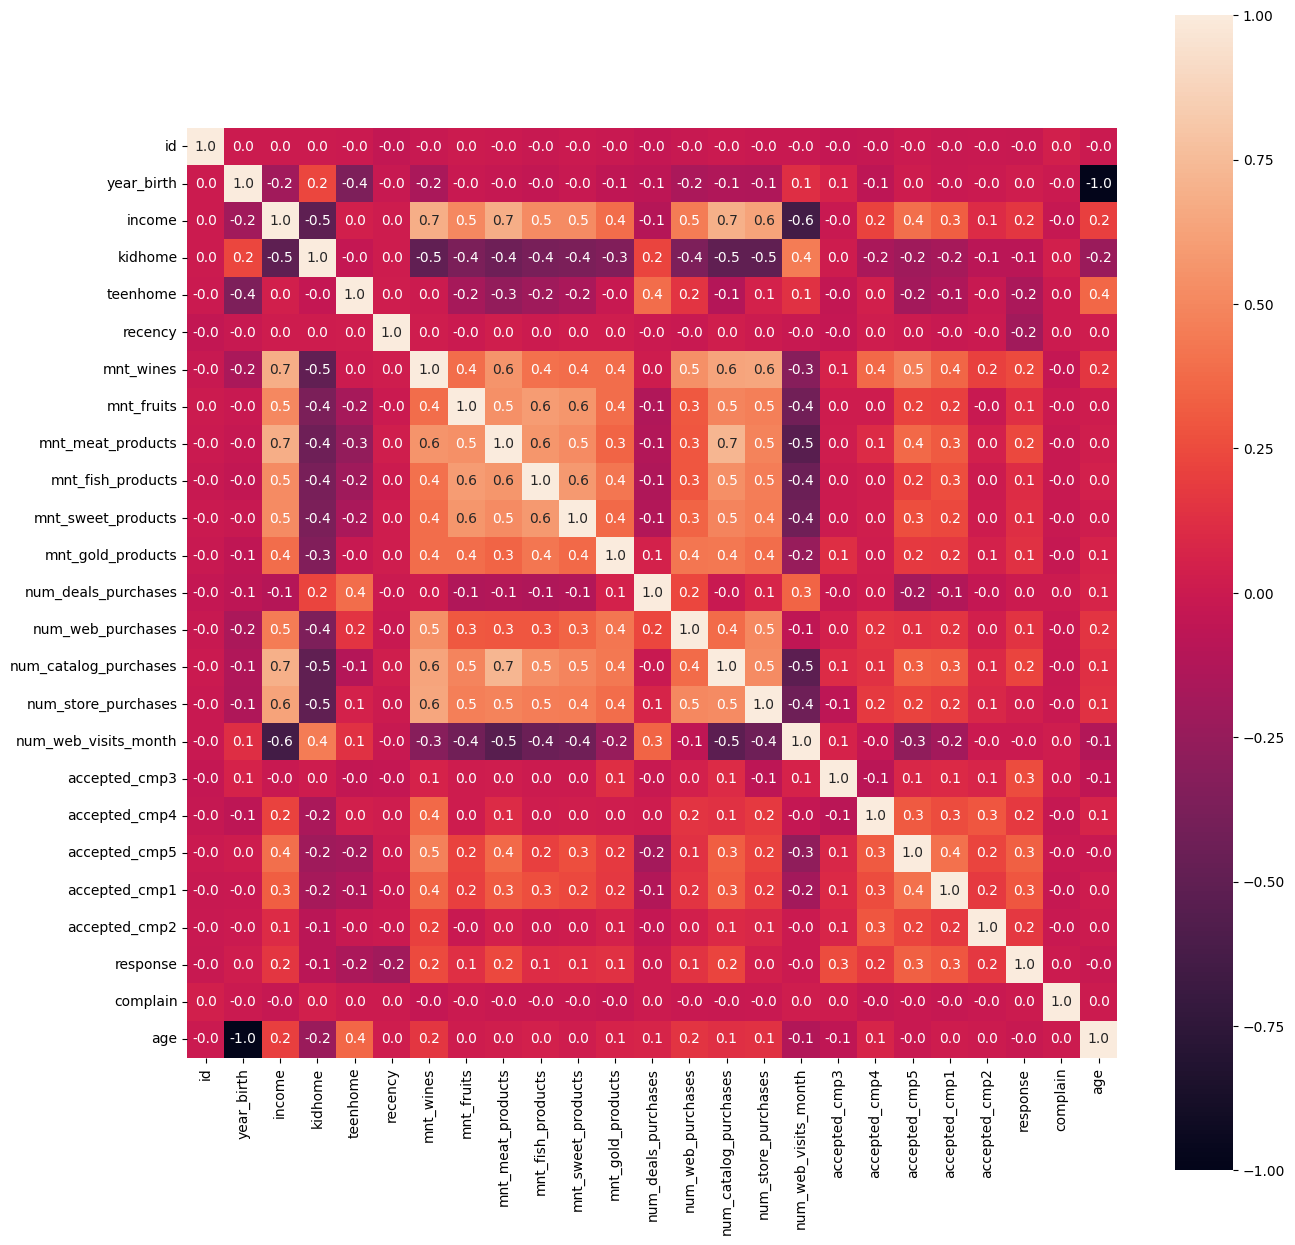

In [223]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, square=True, fmt=".1f");

The table of correlations does not offer much help as there are too many numbers to read through. However, the heat map shows that `income` will be the major variable to focus on in the analysis. 

#### Purchasing Behavior by Income <a class="anchor" id="section3_2"></a>

Now it's time to start looking into the big question. A `for` loop is used to see the relationship bewteen `income` and each `num_{type}_purchases` variable. The `hue` parameter with the `education` variable is used to see if there are any patterns that can be deciphered between `education` and `num_{type}_purchases`. 

First scatterplots are used and then regression plots are used for this analysis.

In [265]:
df.columns[15:19]

Index(['num_deals_purchases', 'num_web_purchases', 'num_catalog_purchases',
       'num_store_purchases'],
      dtype='object')

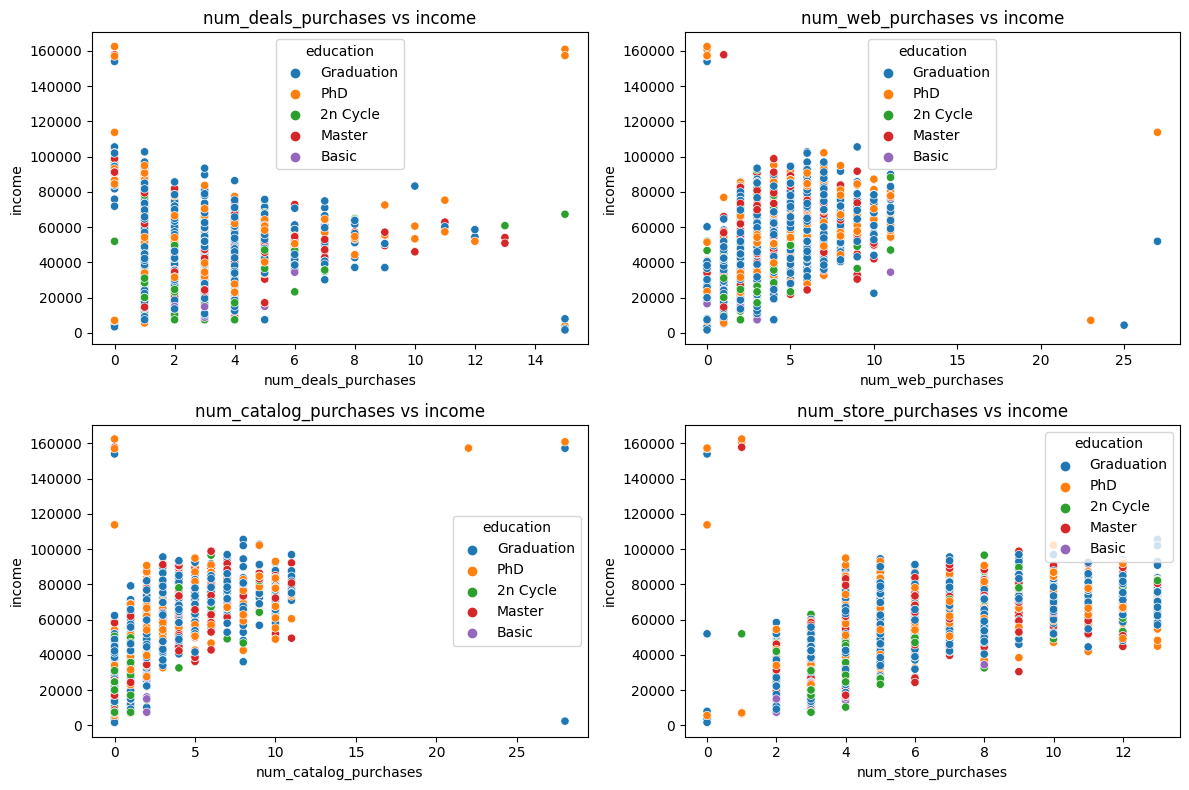

In [270]:
plt.figure(figsize=(12,8))
i = 1
for col in df.columns[15:19]:
    plt.subplot(2,2,i)
    sns.scatterplot(data = df, x = col, y = "income", hue = "education")
    plt.title(f"{col} vs income")
    i += 1
plt.tight_layout()

There is a fairly strong, positive linear relationship between `income` and the following three variables:
* `num_catalog_purchases`
* `num_store_purchases`
* `num_web_purchases`

Between `income` and `NumDealsPurchaes`, however, there is no obvious relationship. It appears there might be a weak, negative linear relationship but it is not strong enough to be confident. It is also difficult to decipher any patterns associated with `education` in the plots, so further analysis will be done on this variable.

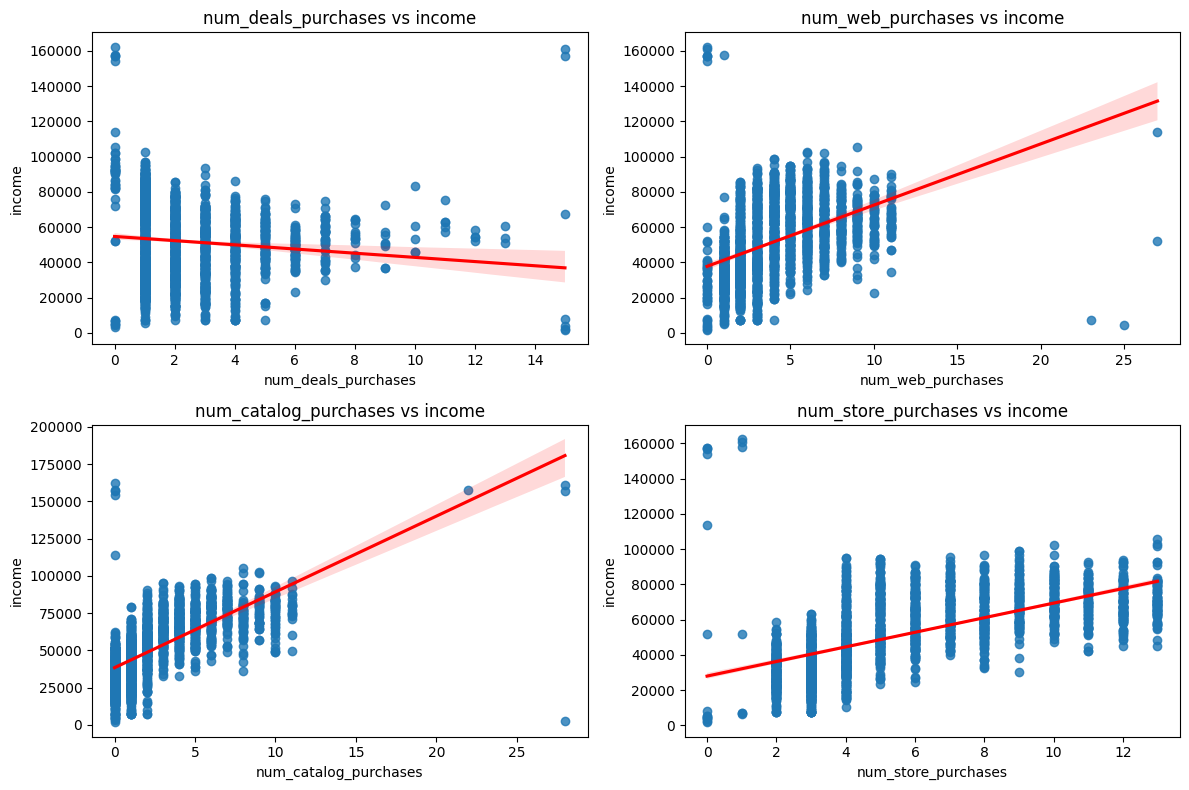

In [273]:
plt.figure(figsize=(12,8))
i = 1
for col in df.columns[15:19]:
    plt.subplot(2,2,i)
    sns.regplot(data = df, x = col, y = "income", line_kws={"color" : "red"})
    plt.title(f"{col} vs income")
    i += 1
plt.tight_layout()

To get a better look at the linear relationships, `.regplot()` was used. `num_catalog_purchases` and `num_store_purchases` have the strongest positive, linear relationship with `income`. 

These plots also show that `income` and `num_deals_purchases` have a linear, negative relationship; however, it is still too weak to be conclusive.

For some further analysis, a new column in the DataFrame called `total_purchases` is added to the `marketing_data` DataFrame. It is the sum of all `num_{type}_purchases` variables. The same analysis with `.scatterplot()` and `.regplot()` plot methods is done on this new column.

In [279]:
df["total_purchases"] = df[df.columns[15:19]].apply(np.sum, axis=1)

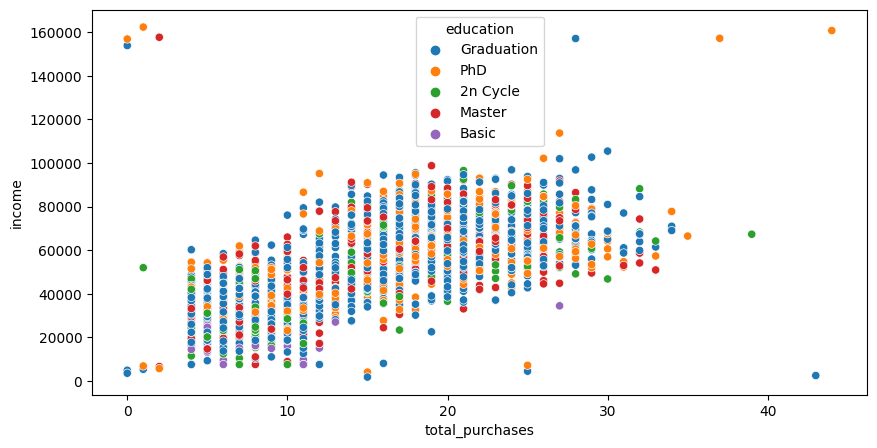

In [287]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data = df, x = "total_purchases", y = "income", hue="education");

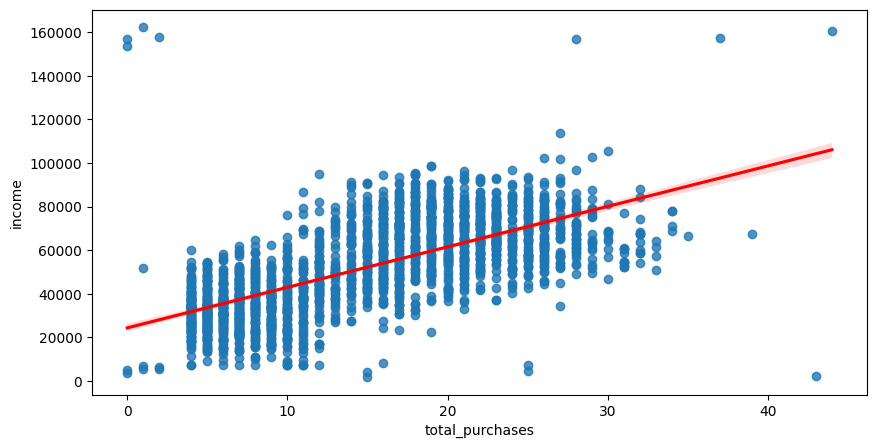

In [288]:
plt.figure(figsize=(10, 5))
sns.regplot(data = df, x = "total_purchases", y = "income", line_kws={"color" : "red"});

The overall relationship between `income` and `total_purchases` is strong and linear. Unfortunately, it is still hard to decipher any relationship with the `education` and `total_purchases` as the points are scattered randomly across the plot.

#### More Purchasing Behavior by Income <a class="anchor" id="section3_3"></a>

The following analysis is very similar as before. However, instead of looking at the relationship between `income` and `num_{type}_purchases`, this analysis will be looking at the relationship between `income` and `mnt_{type}_products`. The steps for this analysis will essentially be the same.

In [297]:
df.columns[9:15]

Index(['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products',
       'mnt_sweet_products', 'mnt_gold_products'],
      dtype='object')

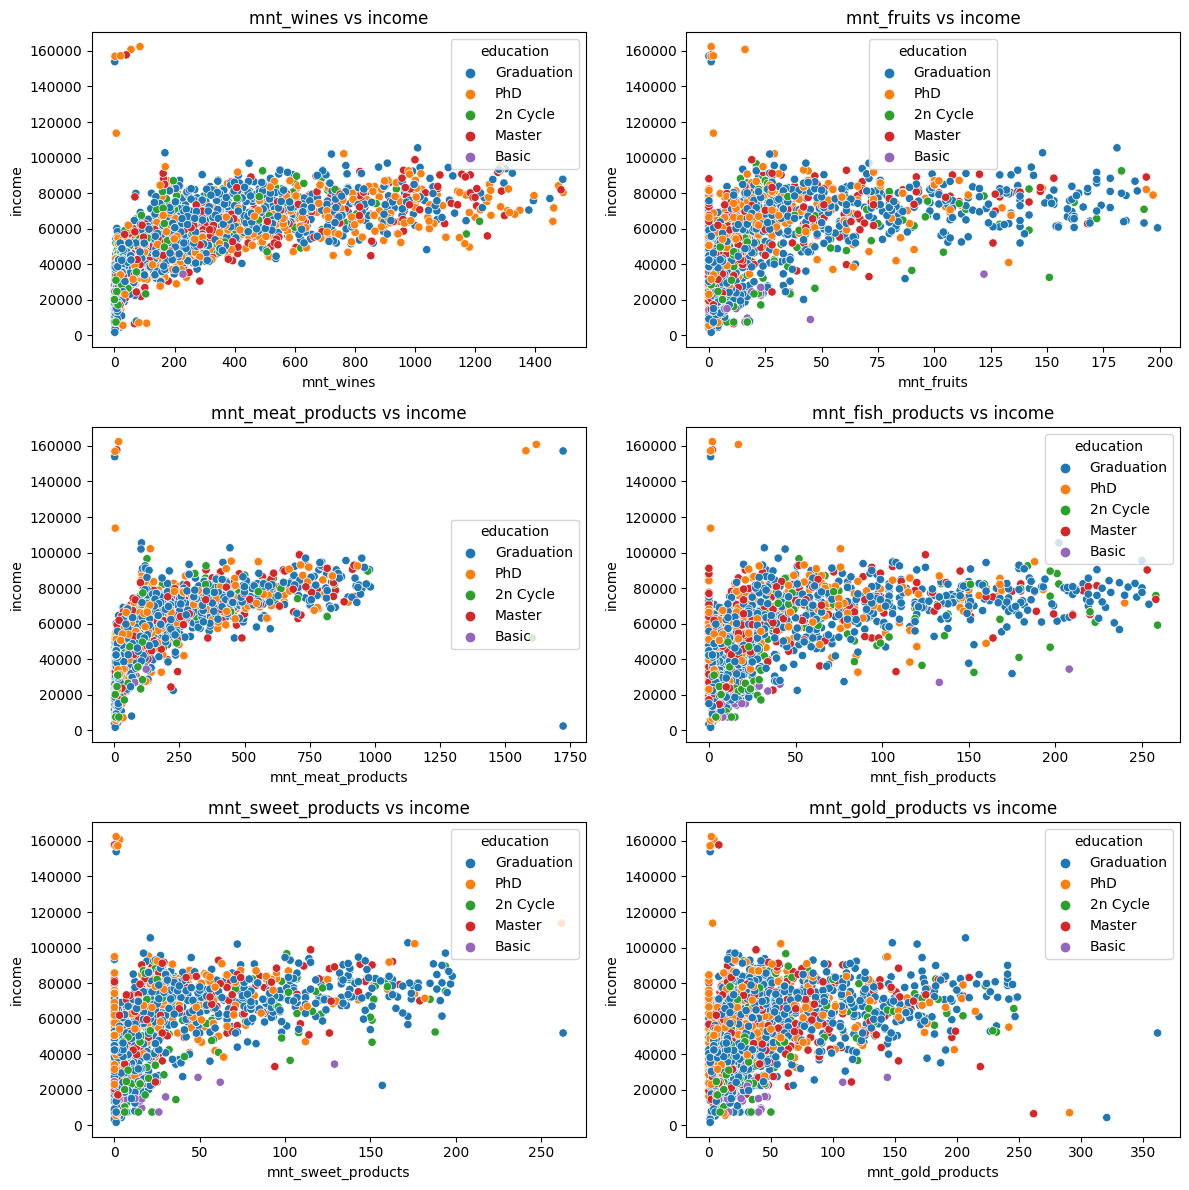

In [304]:
plt.figure(figsize=(12,12))
i = 1
for col in df.columns[9:15]:
    plt.subplot(3,2,i)
    sns.scatterplot(data = df, x = col, y = "income", hue="education")
    plt.title(f"{col} vs income")
    i += 1
plt.tight_layout()

These plots all show a positive relationship between `income` and each `mnt_{type}_products` variable. However, there is not enough visual evidence to see that it is linear. For further analysis, The *log* scale of the the `income` variable and the `mnt_{type}_products` variables are plotted.

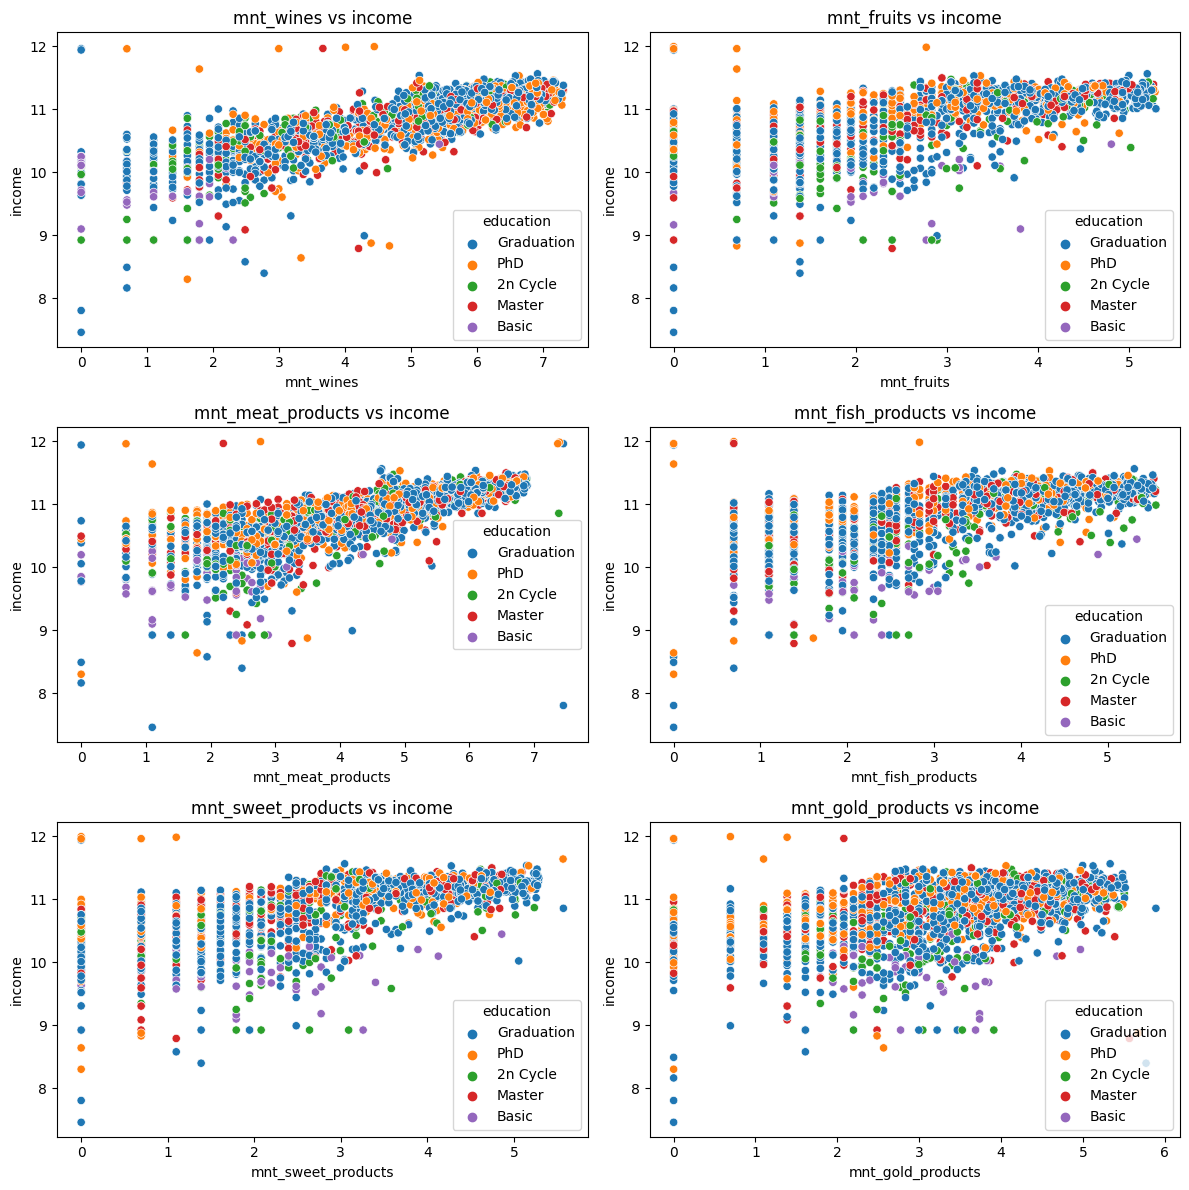

In [309]:
plt.figure(figsize=(12,12))
i = 1
for col in df.columns[9:15]:
    plt.subplot(3,2,i)
    sns.scatterplot(x = np.log(df[col]), y = np.log(df["income"]), hue=df["education"])
    plt.title(f"{col} vs income")
    i += 1
plt.tight_layout()

With the *log* scaled variables, it is easy to see there is an fairly strong linear, positive relationship between the variables across the board. It is still hard to see how education plays a role, however.

#### Purchasing Behavior by Education and Income <a class="anchor" id="section3_4"></a>

A seaborn method called `.FacetGrid()` is used to see how education effects purchasing behavior along with `income`. It gives a much clearer picture than the `hue` parameter in previous plots. In this analysis, a loop and a dynamic Python variable are used to plot six sets of `.FacetGrid()` plots.

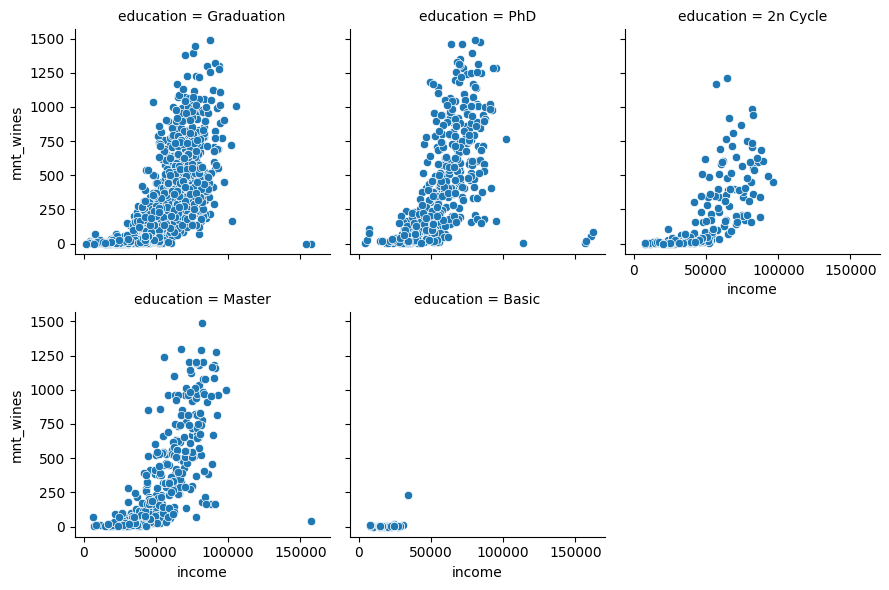

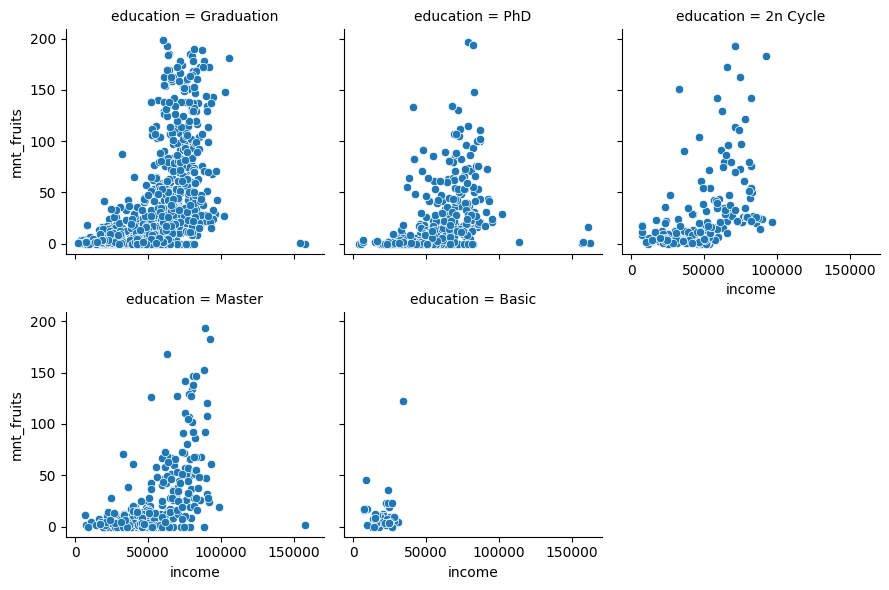

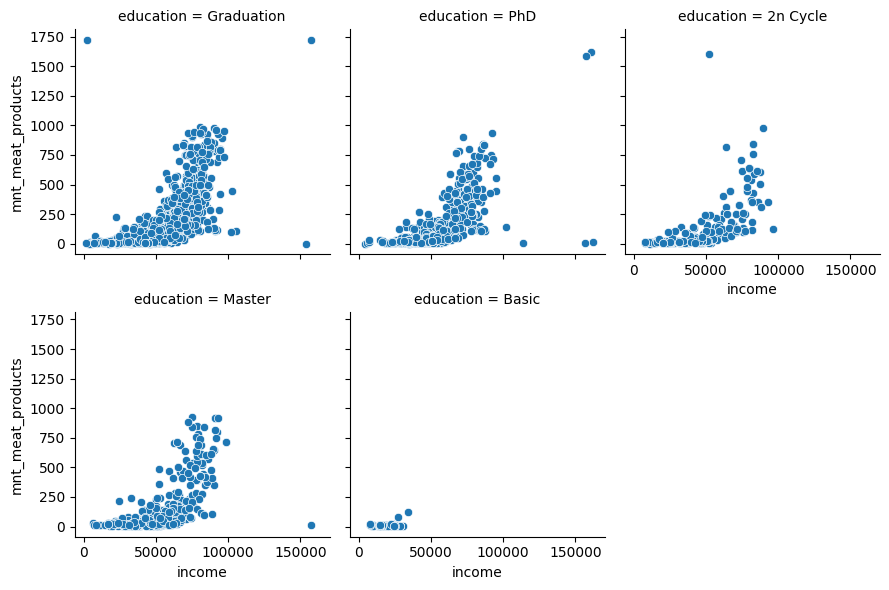

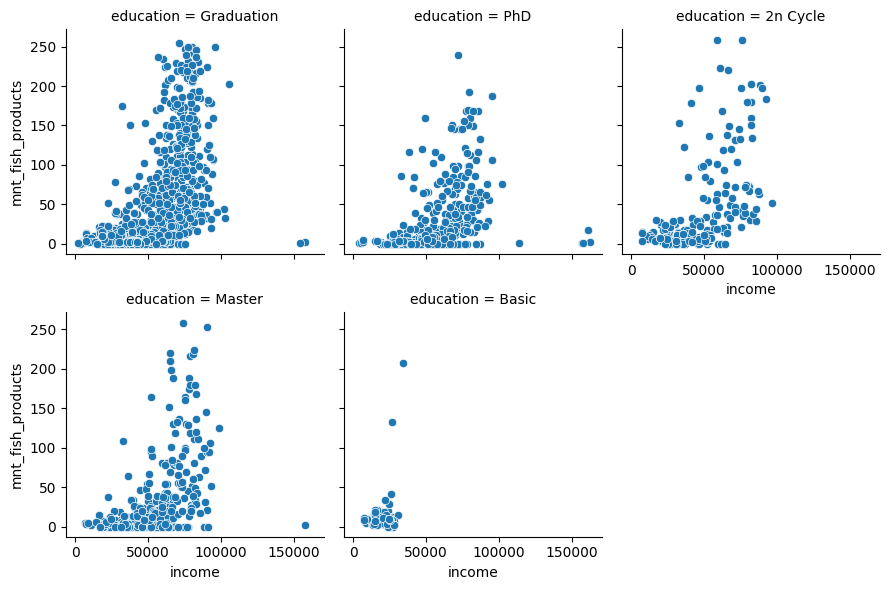

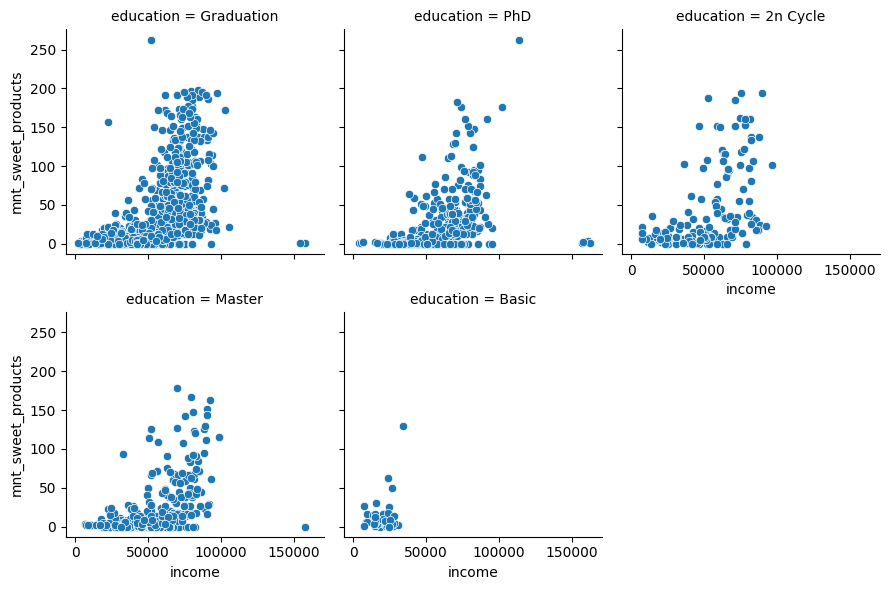

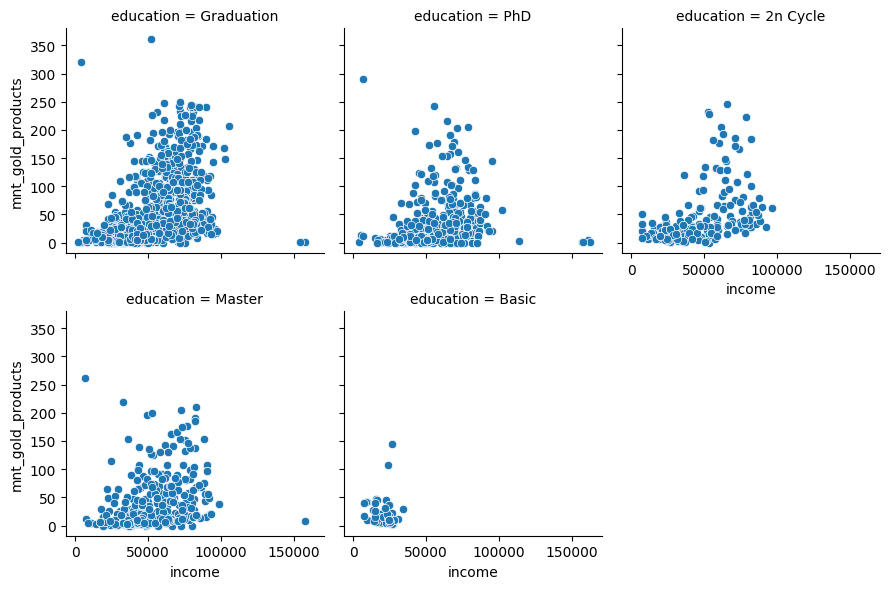

In [328]:
for col in df.columns[9:15]:
    ax = sns.FacetGrid(data = df, col="education", col_wrap=3)
    ax.map(sns.scatterplot,"income",  col)
plt.tight_layout()

After observing the plots detailing the relationship between income, education, and purchasing behavior, the following can be seen:
* This store does not have many shoppers with a `Basic` education level.
* Regardless of the shopper's educational level, there is a positive, linear relationship for each `mnt_{type}_products`.
* `mnt_wines` has the strongest positive, linear relationship with `education` by `income`.

#### Purchasing Behavior by Age <a class="anchor" id="section3_5"></a>

The last main variable in our analysis plan is `age`. The `.scatterplot()` method is used to see if there is any relationship bewteen `age` and any purchasing behavior variables. The initial analysis showed no evidence of relationship as shown in all the graphs below. The graphs shown are:
* `total_purchases` vs. `age`
* `mnt_{type}_products` vs. `age`
* `num_{type}_purchases` vs. `age`

The process used to plot each one of these graphs is very similar to the one outlined in the Purchasing Behavior by income section.

In [331]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mnt_wines', 'mnt_fruits',
       'mnt_meat_products', 'mnt_fish_products', 'mnt_sweet_products',
       'mnt_gold_products', 'num_deals_purchases', 'num_web_purchases',
       'num_catalog_purchases', 'num_store_purchases', 'num_web_visits_month',
       'accepted_cmp3', 'accepted_cmp4', 'accepted_cmp5', 'accepted_cmp1',
       'accepted_cmp2', 'response', 'complain', 'country', 'age',
       'total_purchases'],
      dtype='object')

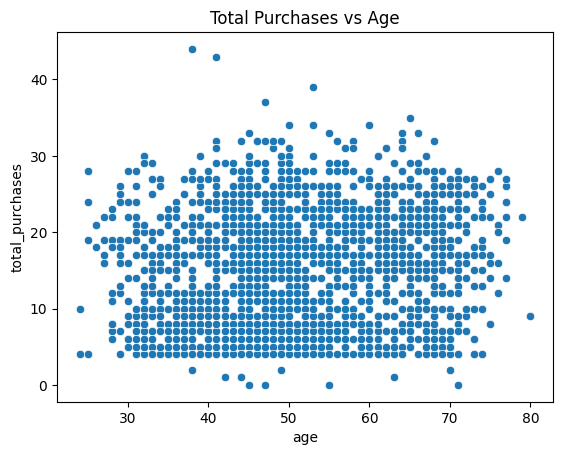

In [335]:
sns.scatterplot(data=df, x = "age", y = "total_purchases")
plt.title("Total Purchases vs Age");

It is hard to see any relationship between `age` and `total_purchases` in this plot.

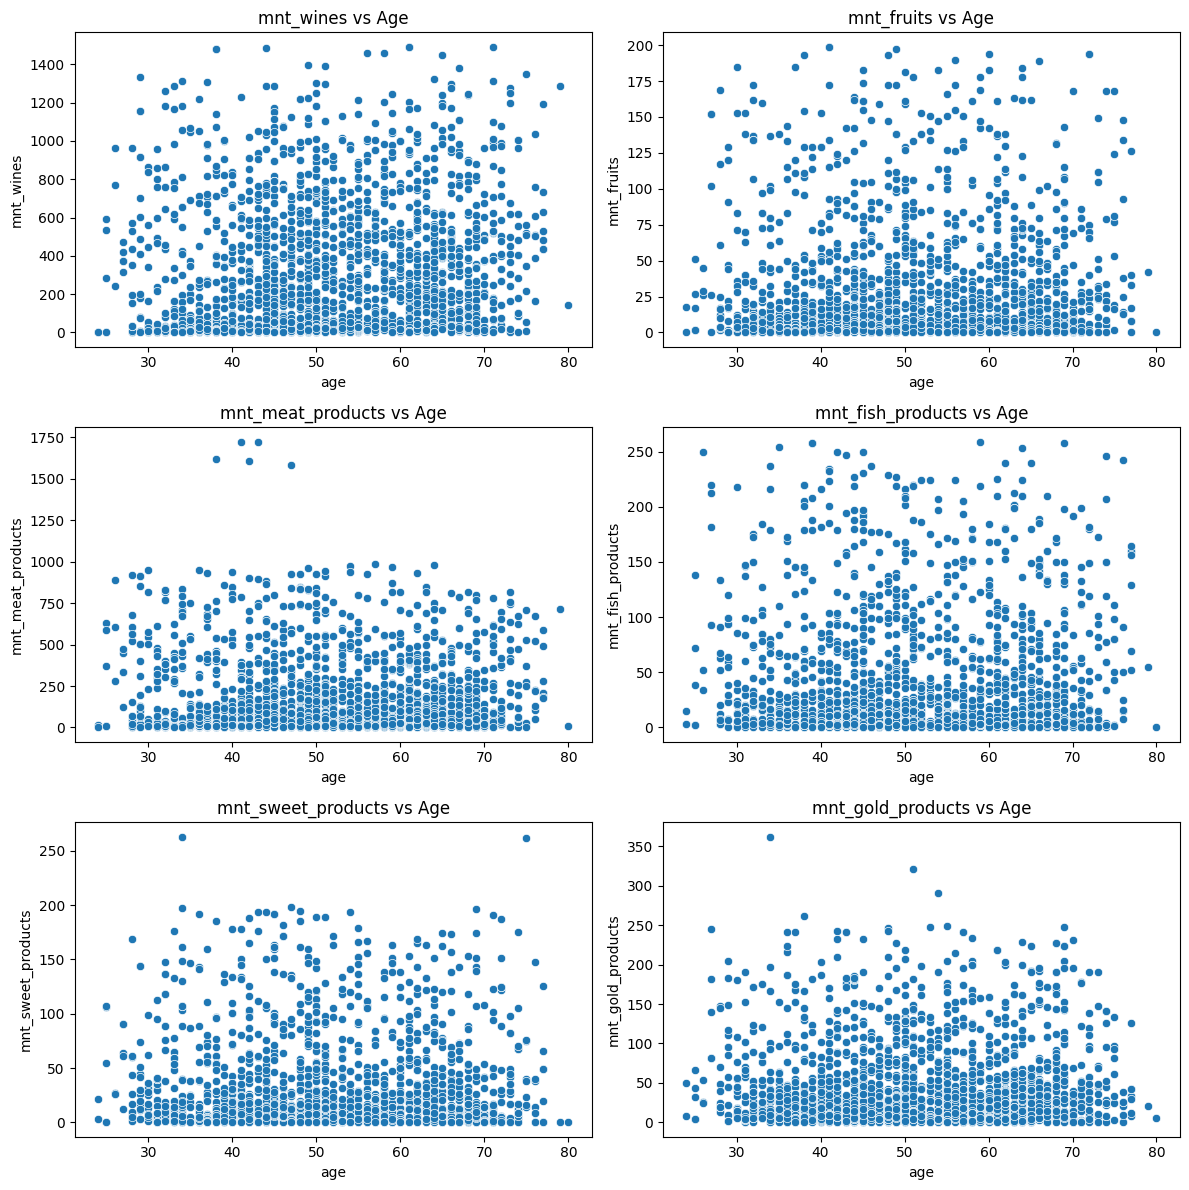

In [347]:
plt.figure(figsize=(12,12))
i = 1
for col in df.columns[9:15]:
    plt.subplot(3,2,i)
    sns.scatterplot(data = df, x = "age", y = col)
    plt.title(f"{col} vs Age")
    i += 1
plt.tight_layout()

Again, it is difficult to decipher any pattern between `age` and any `mnt_{type}_products` in any of these plots. A different strategy may be useful to analyze `age`.

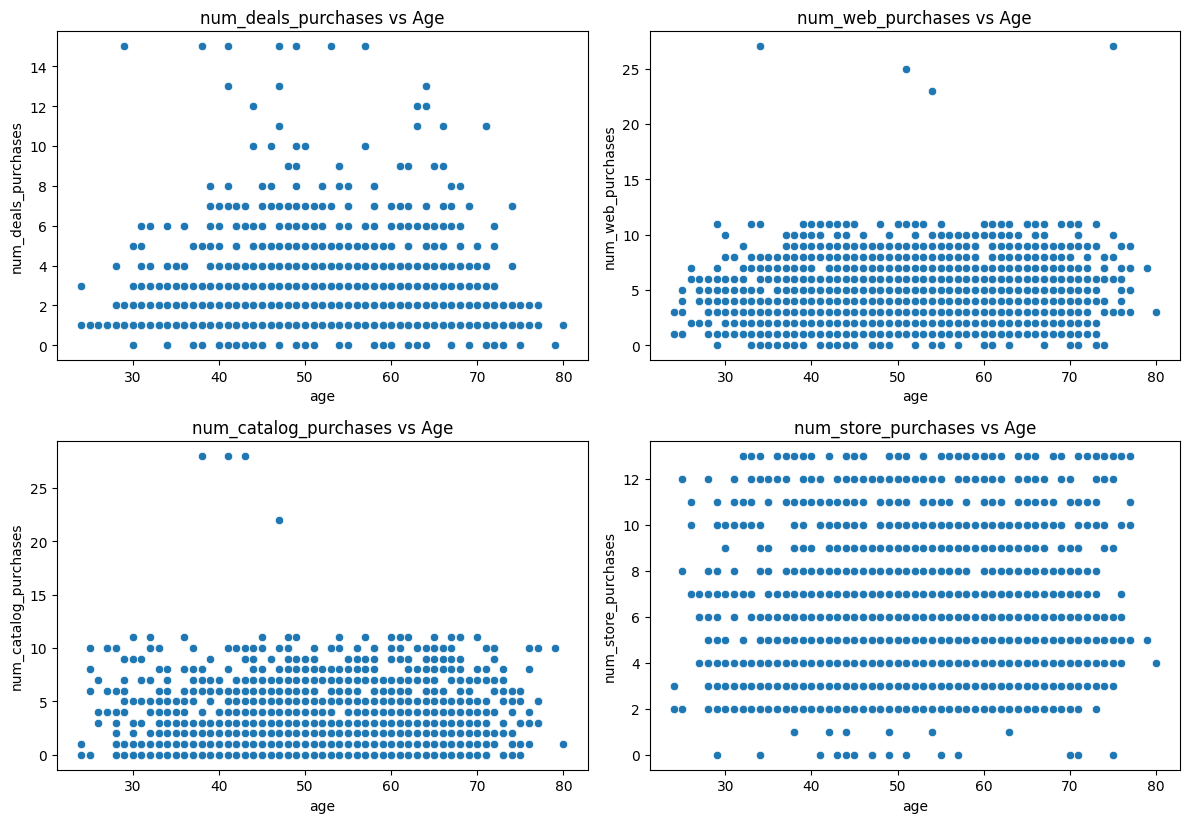

In [348]:
plt.figure(figsize=(12,12))
i = 1
for col in df.columns[15:19]:
    plt.subplot(3,2,i)
    sns.scatterplot(data = df, x = "age", y = col)
    plt.title(f"{col} vs Age")
    i += 1
plt.tight_layout()

It is also difficult to decipher any pattern between `age` and any `num_{type}_purchases` in any of these plots. Because of this, a different analysis strategy will be used on the `age` variable.

To do further analysis on the `age` variable, A new column called `age_group` is added to `marketing_data`. It contains the following categories of ages:
* `18 to 35`
* `36 to 50`
* `51 to 70`
* `71 and Older`

This categorical variables may give a more clear story.

In [359]:
df["age"].describe()

count    2236.000000
mean       51.101968
std        11.703281
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: age, dtype: float64

In [367]:
pd.cut(x= df["age"], bins = [17,35,50,70,80])

0       (35, 50]
1       (50, 70]
2       (50, 70]
3       (50, 70]
4       (17, 35]
          ...   
2235    (35, 50]
2236    (35, 50]
2237    (35, 50]
2238    (35, 50]
2239    (50, 70]
Name: age, Length: 2236, dtype: category
Categories (4, interval[int64, right]): [(17, 35] < (35, 50] < (50, 70] < (70, 80]]

In [369]:
df["age_group"] = pd.cut(x= df["age"], bins = [17,35,50,70,80])

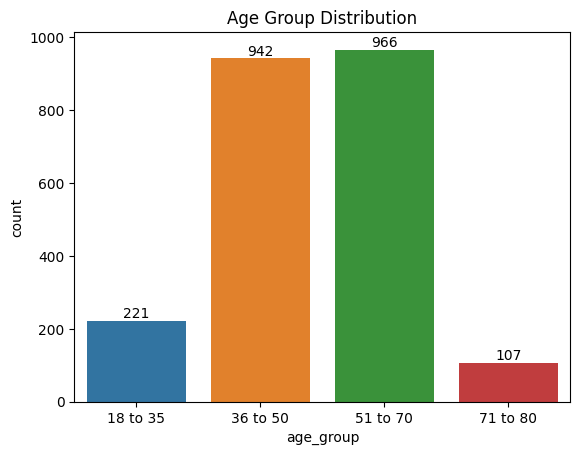

In [380]:
ax = sns.countplot(df["age_group"])
for i in ax.containers:
    ax.bar_label(i)
plt.title("Age Group Distribution")
ax.set_xticklabels(["18 to 35", "36 to 50", "51 to 70", "71 to 80"])
plt.show()

The `age_group` variable proved to be much more useful quickly as a bar chart showed that `36 to 50` and `51 to 70` year-old age groups dominated shopping at the store.

To take the analysis further, a new DataFrame is created, which only has information about shopper age (`age` and `age_group`) and the total purchase amounts each age group buys (`mnt_{type}_products`). This new DataFrame will have `age_groups` as row data to make plotting a grouped bar graph easier.

In [382]:
df2 = df[["age_group", "mnt_wines", "mnt_fruits", "mnt_meat_products", "mnt_fish_products", "mnt_sweet_products", "mnt_gold_products"]]

In [391]:
df2.groupby("age_group").sum().reset_index()

age_group  mnt_wines  mnt_fruits  mnt_meat_products  mnt_fish_products  \
0  (17, 35]      56904        6781              45438               8864   
1  (35, 50]     239089       22630             139914              32510   
2  (50, 70]     330795       25506             160252              36617   
3  (70, 80]      53241        3836              27771               5940   

   mnt_sweet_products  mnt_gold_products  
0                6941               9694  
1               23843              37167  
2               25627              46514  
3                4141               4971

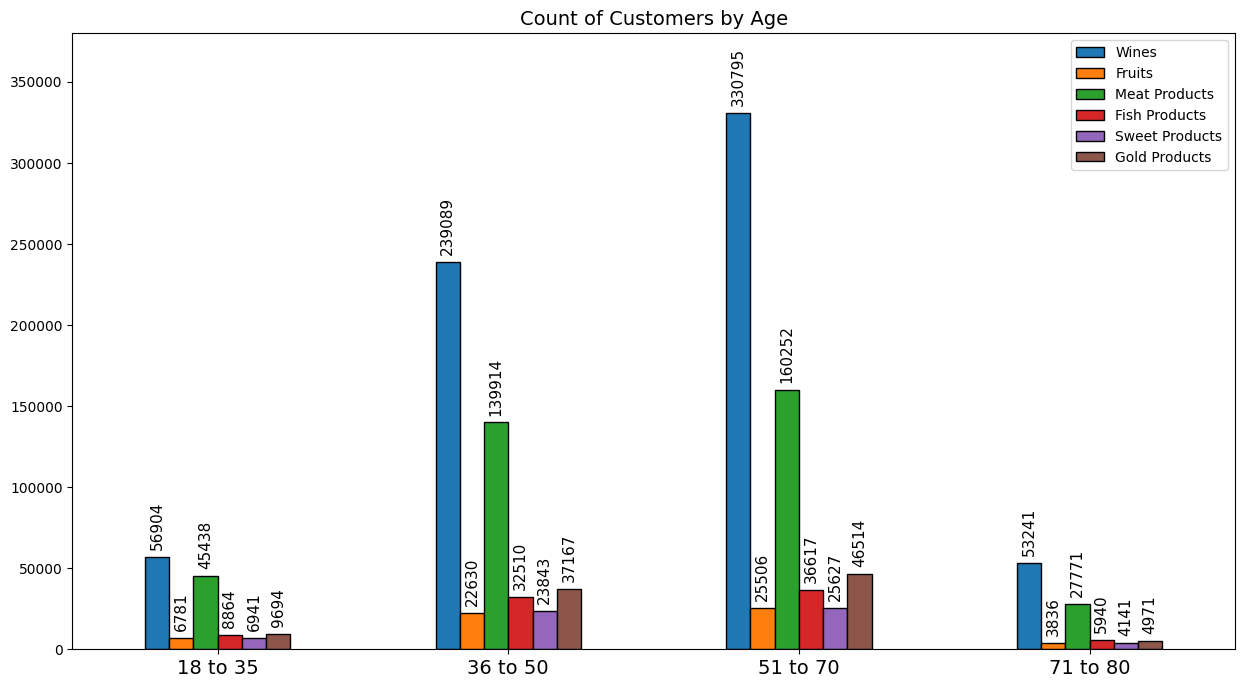

In [431]:
ax = df2.groupby("age_group").sum().reset_index().plot(kind="bar", figsize=(15,8), edgecolor="black")
for i in ax.containers:
    ax.bar_label(i, rotation=90, padding=5, fontsize=11)
ax.set_xticklabels(["18 to 35", "36 to 50", "51 to 70", "71 to 80"], rotation=0, fontsize=14)
plt.title("Count of Customers by Age", fontsize=14)
plt.ylim([0, 380000])
plt.legend(labels=["Wines", "Fruits", "Meat Products", "Fish Products","Sweet Products", "Gold Products"])
plt.show()

Across the board, `age_group` does not seem to effect purchasing habits. Wine is the most popular bought item for each age group followed by meat products. The least popular bought item is fruits for each age group. The next analysis of interest is to see if `age_group` affects how many items customers buy each time. 

In [445]:
df3 = df[["age_group", "num_deals_purchases", "num_web_purchases", "num_catalog_purchases", "num_store_purchases"]]

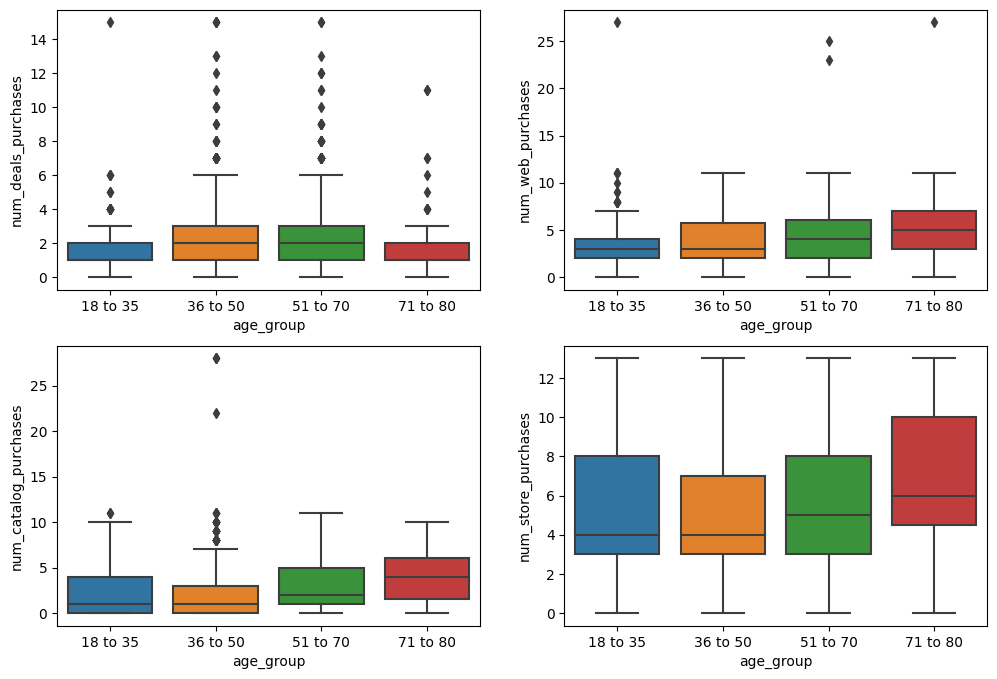

In [453]:
plt.figure(figsize=(12,8))
i = 1
for col in df3.drop(columns="age_group"):
    plt.subplot(2,2,i)
    ax =sns.boxplot(data=df3, x = "age_group", y = col)
    ax.set_xticklabels(["18 to 35", "36 to 50", "51 to 70", "71 to 80"])
    i += 1

This chart yields some very interesting insights. Here are some notable ones:
* `18 to 35` and `71 and Older` age groups tend to be the least interested in deals.
* On average, `71 and Older` age group customers tend to shop the most online, in store, and through the catalog.
* `36 to 50` and `51 to 70` age groups are interested in deals. Most likely this is because they receive more deals since they have more loyal customers.

This information could be super helpful for a marketing department as strategies could be used to increase `36 to 50` and `71 and Older` customers for the store.

### Conclusion <a class="anchor" id="conclusion"></a>

#### Findings Overview

It has been shown `income` has the strongest relationship with purchase behavior of customers. However, interesting insights about `education` and `age` along with `age_group` have still been noted. These insights would be very helpful to how this store markets deals to their customers and prices items, such as wine since higher income groups tend to dominate alcohol sales. There is also opportunity to increase market to the `18 to 35` and `71 and Older` age groups to drive products sales. 

#### Next Steps

This dataset also has plenty of information has still not been touched upon yet. Some things to consider in a future analysis are:
* Results from existing marketing campaings
* Geographical data
* Customer marital status
* Customer complaints

Happy Coding!